## 2023 Los Angeles Crash Data Analysis

This project analyzes a dataset of all reported vehicular traffic accidents in Los Angeles in the year 2023.  In correspondance with this dataset, an imported dataset of the precipitation, wind, and pressure was used to explain some of the trends within the data.
In this project, I cleaned the dataset and merged the two datasets as well as fitting a Linear Regression model onto the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
traffic_df = pd.read_excel(r"C:\Users\mcgun\OneDrive\Documents\Working_Traffic_Data_Cleaned.xlsx")
weather_df = pd.read_excel(r"C:\Users\mcgun\OneDrive\Documents\LAWeatherData.xlsx")
print('The number of rows in traffic_df is', traffic_df.shape[0])

The number of rows in traffic_df is 16376


In [3]:
# Replace NA's with 'Unknown' and drops empty rows
traffic_df.replace('Unknown', np.nan, inplace = True)
traffic_df.dropna(inplace = True)
traffic_df.rename(columns = {'Date Occurred': 'Date'}, inplace = True)
print('The number of rows in traffic_df is now', traffic_df.shape[0])
traffic_df.head()

The number of rows in traffic_df is now 13415


,DR Number,Date,Time Occurred (Military),Time Occurred (Standard),During Peak Traffic,Area Name,Number of Crimes,Crime Code,Victim Age,Victim Age Range,Victim Sex,Victim Descent,Premise Description,Address,Cross Street,Zip Codes
0,230504066,2023-01-02,1805,18:05:00,Yes (Evening Rush),Harbor,5,997 TRAFFIC COLLISION,51.0,Middle-Aged,Male,Asian,STREET,GAFFEY ST,10TH ST,3342.0
1,230304125,2023-01-02,1615,16:15:00,Yes (Evening Rush),Southwest,4,997 TRAFFIC COLLISION,45.0,Middle-Aged,Male,Hispanic/Latin,STREET,BROWNING BL,VERMONT AV,23668.0
2,231204085,2023-01-02,2220,22:20:00,No,77th Street,4,997 TRAFFIC COLLISION,27.0,Adult,Male,Hispanic/Latin,STREET,FIGUEROA ST,69TH ST,23675.0
4,231104138,2023-01-02,740,07:40:00,Yes (Morning Rush),Northeast,10,997 TRAFFIC COLLISION,99.0,Elderly,Male,White,STREET,GRAND VIEW,PARK ROW,22728.0
5,231304076,2023-01-02,1618,16:18:00,Yes (Evening Rush),Newton,10,997 TRAFFIC COLLISION,50.0,Middle-Aged,Male,Hispanic/Latin,STREET,25TH ST,CENTRAL AV,22727.0


In [4]:
# Drops uneccessary columns from weather_df
weather_df.drop(columns = ['Max Wind Speed (mph)', 'Min Wind Speed (mph)', 'Max Pressure', 'Min Pressure'], inplace = True)
weather_df.head()

,Date,Avg Wind Speed (mph),Avg Pressure,Precipitation (in)
0,2023-01-01,13.8,29.6,0.87
1,2023-01-02,6.0,29.9,0.10
2,2023-01-03,12.1,29.9,0.05
3,2023-01-04,10.5,29.9,0.04
4,2023-01-05,13.2,29.9,0.96


In [5]:
# Joins the weather_df and traffic_df
df = traffic_df.merge(weather_df, how = 'inner', on = 'Date')
df.head()

,DR Number,Date,Time Occurred (Military),Time Occurred (Standard),During Peak Traffic,Area Name,Number of Crimes,Crime Code,Victim Age,Victim Age Range,Victim Sex,Victim Descent,Premise Description,Address,Cross Street,Zip Codes,Avg Wind Speed (mph),Avg Pressure,Precipitation (in)
0,230504066,2023-01-02,1805,18:05:00,Yes (Evening Rush),Harbor,5,997 TRAFFIC COLLISION,51.0,Middle-Aged,Male,Asian,STREET,GAFFEY ST,10TH ST,3342.0,6.0,29.9,0.1
1,230304125,2023-01-02,1615,16:15:00,Yes (Evening Rush),Southwest,4,997 TRAFFIC COLLISION,45.0,Middle-Aged,Male,Hispanic/Latin,STREET,BROWNING BL,VERMONT AV,23668.0,6.0,29.9,0.1
2,231204085,2023-01-02,2220,22:20:00,No,77th Street,4,997 TRAFFIC COLLISION,27.0,Adult,Male,Hispanic/Latin,STREET,FIGUEROA ST,69TH ST,23675.0,6.0,29.9,0.1
3,231104138,2023-01-02,740,07:40:00,Yes (Morning Rush),Northeast,10,997 TRAFFIC COLLISION,99.0,Elderly,Male,White,STREET,GRAND VIEW,PARK ROW,22728.0,6.0,29.9,0.1
4,231304076,2023-01-02,1618,16:18:00,Yes (Evening Rush),Newton,10,997 TRAFFIC COLLISION,50.0,Middle-Aged,Male,Hispanic/Latin,STREET,25TH ST,CENTRAL AV,22727.0,6.0,29.9,0.1


In [6]:
# Finds the number of crashes per day and joins it with the weather_df dataset
crash_counts = traffic_df.groupby('Date').size().reset_index(name = 'crash_count')
crash_weather_df = crash_counts.merge(weather_df, how = "inner", on = "Date")
crash_weather_df.head()

,Date,crash_count,Avg Wind Speed (mph),Avg Pressure,Precipitation (in)
0,2023-01-02,30,6.0,29.9,0.10
1,2023-01-03,34,12.1,29.9,0.05
2,2023-01-04,48,10.5,29.9,0.04
3,2023-01-05,29,13.2,29.9,0.96
4,2023-01-06,26,4.5,30.1,0.64


In [7]:
from sklearn import linear_model

In [8]:
model1 = linear_model.LinearRegression()
model1.fit(X = pd.DataFrame(crash_weather_df['Precipitation (in)']), y = crash_weather_df['crash_count'])

LinearRegression()

In [9]:
prediction = model1.predict(X = pd.DataFrame(crash_weather_df['Precipitation (in)']))
model1.score(X = pd.DataFrame(crash_weather_df['Precipitation (in)']), y = crash_weather_df['crash_count'])

2.557093923272191e-07

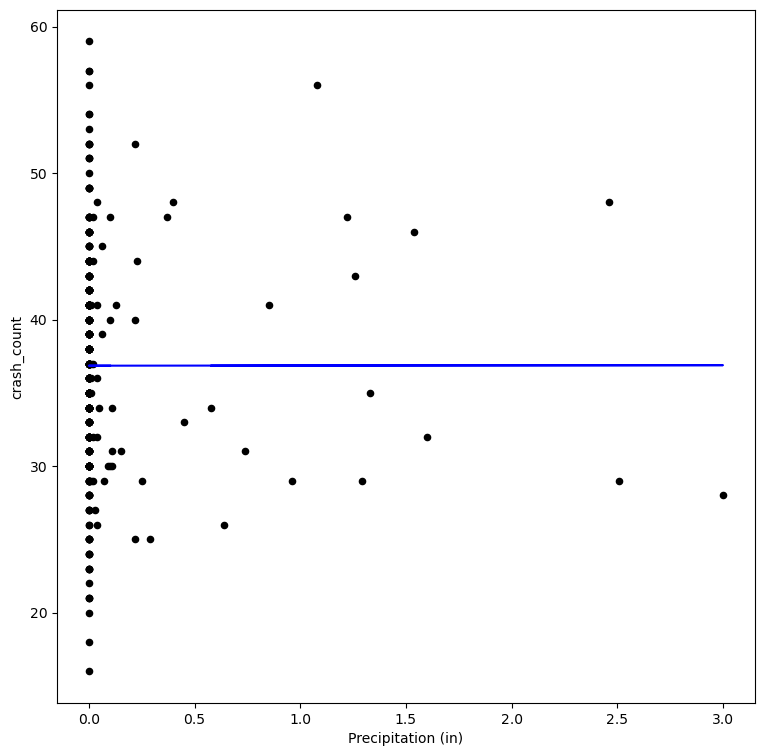

In [11]:
predict = model1.predict(X = pd.DataFrame(crash_weather_df['Precipitation (in)']))
crash_weather_df.plot(kind = 'scatter', 
                      x = 'Precipitation (in)',
                      y = 'crash_count',
                      figsize = (9,9),
                      color = 'black'
                      )

plt.plot(crash_weather_df['Precipitation (in)'],
         predict,
         color = 'blue')

In [12]:
precipitation_crash = crash_weather_df[crash_weather_df['Precipitation (in)'] != 0.0]
precipitation_crash.head()

,Date,crash_count,Avg Wind Speed (mph),Avg Pressure,Precipitation (in)
0,2023-01-02,30,6.0,29.9,0.10
1,2023-01-03,34,12.1,29.9,0.05
2,2023-01-04,48,10.5,29.9,0.04
3,2023-01-05,29,13.2,29.9,0.96
4,2023-01-06,26,4.5,30.1,0.64


In [13]:
model2 = linear_model.LinearRegression()
model2.fit(X = pd.DataFrame(precipitation_crash['Precipitation (in)']), y = precipitation_crash['crash_count'])

LinearRegression()

In [14]:
prediction2 = model2.predict(X = pd.DataFrame(precipitation_crash['Precipitation (in)']))
model2.score(X = pd.DataFrame(precipitation_crash['Precipitation (in)']), y = precipitation_crash['crash_count'])

0.0010050639928373961

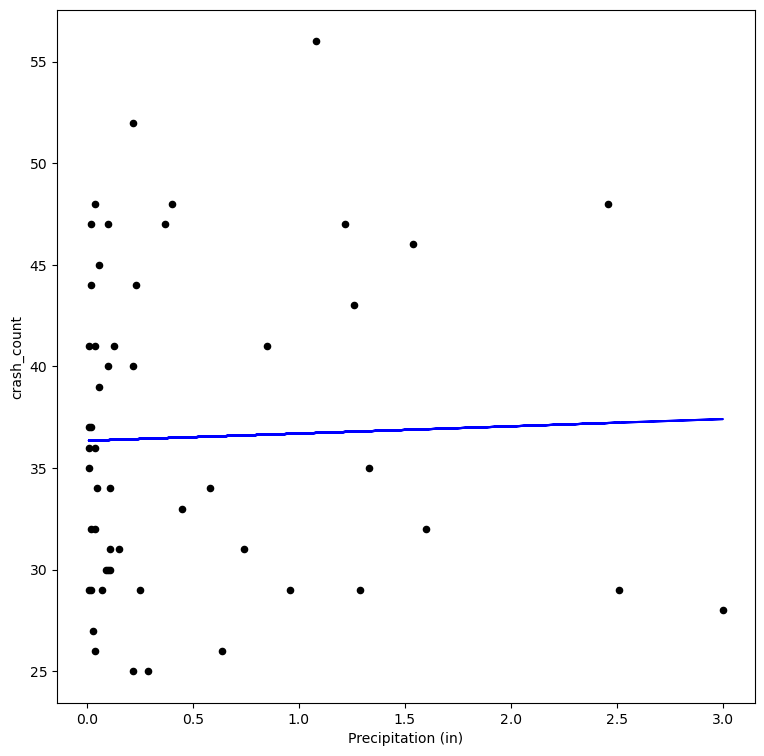

In [15]:
precipitation_crash.plot(kind = 'scatter', 
                      x = 'Precipitation (in)',
                      y = 'crash_count',
                      figsize = (9,9),
                      color = 'black'
                      )

plt.plot(precipitation_crash['Precipitation (in)'],
         prediction2,
         color = 'blue')

Contrary to popular belief, there is no to little correlation between the amount of precipitation and the amount of crashes given each day.

In [16]:
# Creates a yes/no column whether it rained that day or not
crash_weather_df['Rained'] = crash_weather_df['Precipitation (in)'].apply(lambda x: 'yes' if x > 0 else 'no')
crash_weather_df.head()

,Date,crash_count,Avg Wind Speed (mph),Avg Pressure,Precipitation (in),Rained
0,2023-01-02,30,6.0,29.9,0.10,yes
1,2023-01-03,34,12.1,29.9,0.05,yes
2,2023-01-04,48,10.5,29.9,0.04,yes
3,2023-01-05,29,13.2,29.9,0.96,yes
4,2023-01-06,26,4.5,30.1,0.64,yes


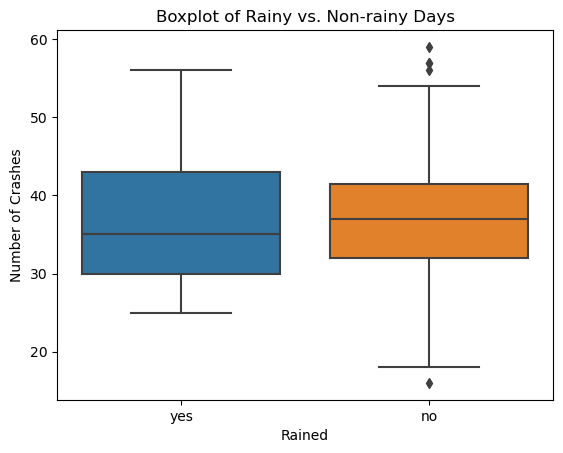

In [17]:
# Creates a boxplot to find the median/IQR of days that rained vs. days that didn't rain
sns.boxplot(x = 'Rained', y = 'crash_count', data = crash_weather_df)
plt.title('Boxplot of Rainy vs. Non-rainy Days')
plt.ylabel('Number of Crashes')
plt.show()

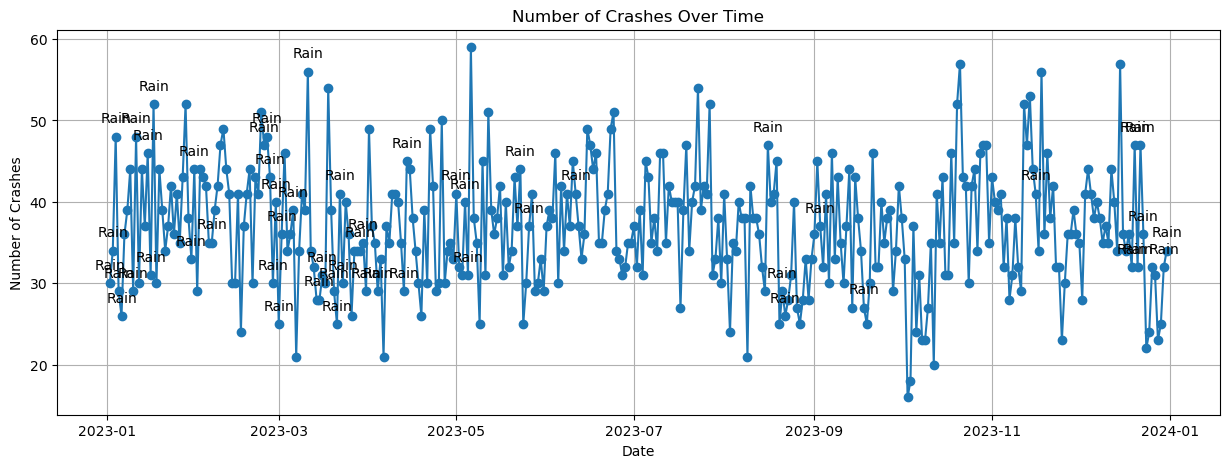

In [22]:
# Creates a time-series plot of 2023 and whether or not it rained
plt.figure(figsize = (15, 5))
plt.plot(crash_weather_df['Date'], crash_weather_df['crash_count'], marker='o')
for i, r in crash_weather_df.iterrows():
    if r['Rained'] == 'yes':
        plt.annotate('Rain', (r['Date'], r['crash_count']), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Number of Crashes Over Time')
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.show()

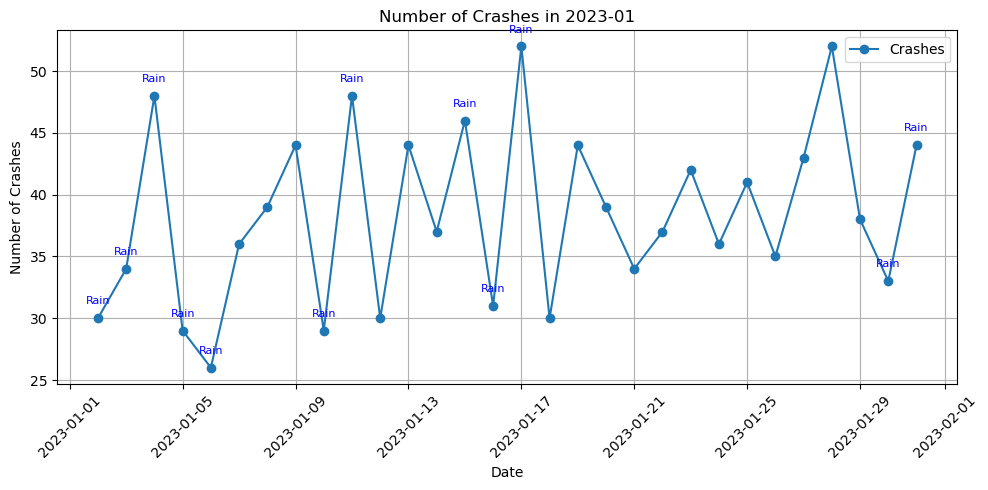

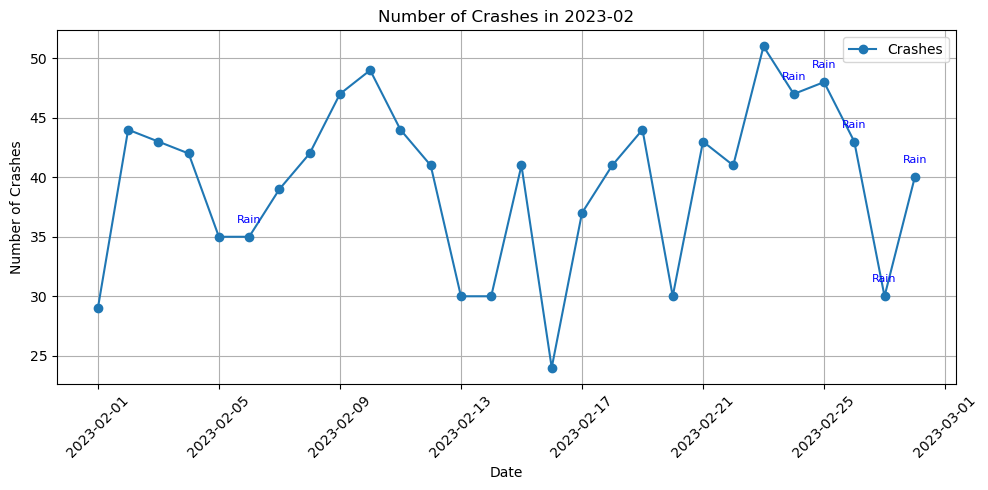

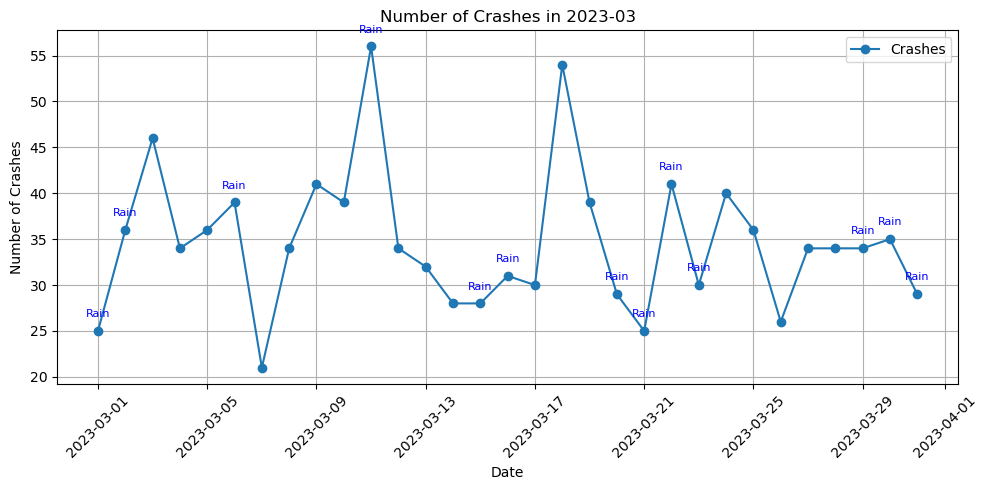

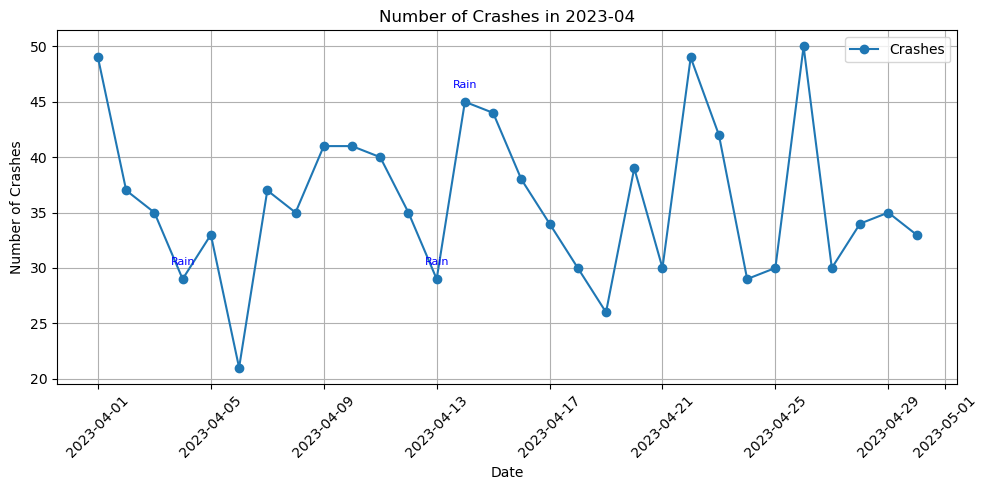

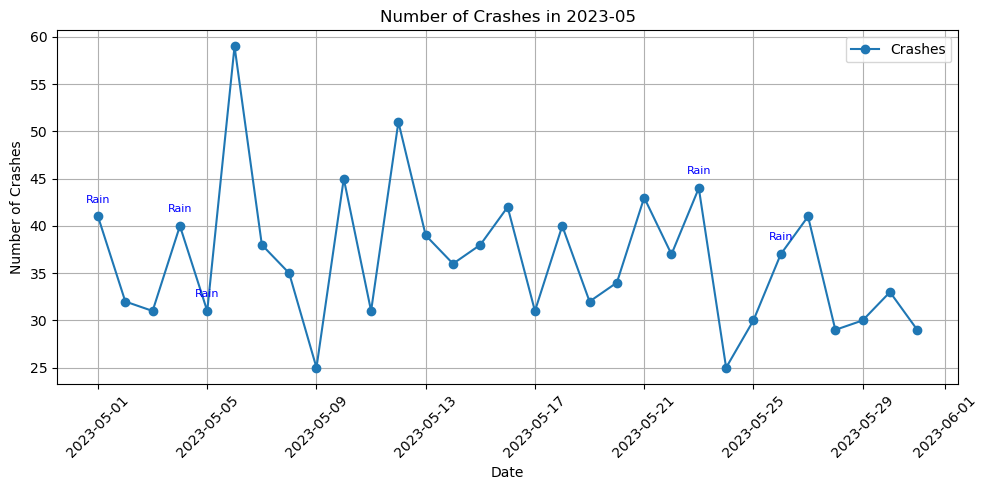

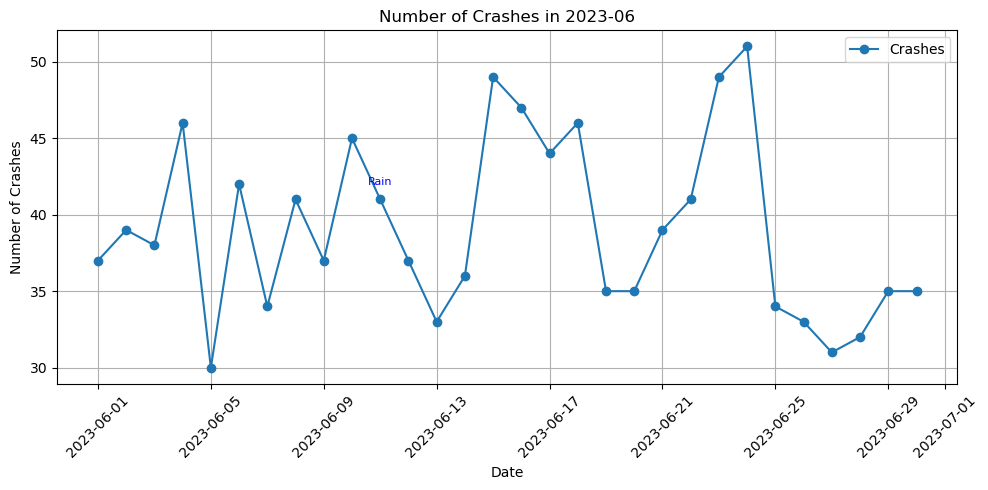

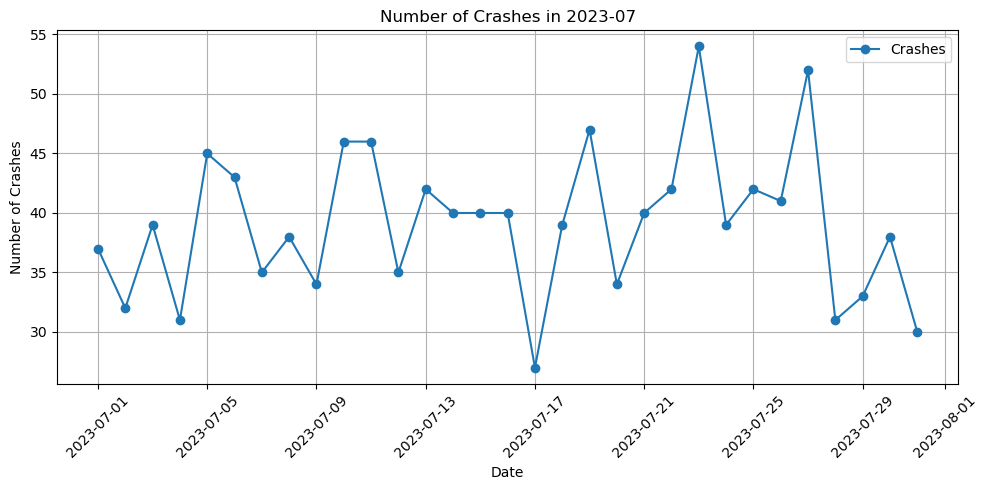

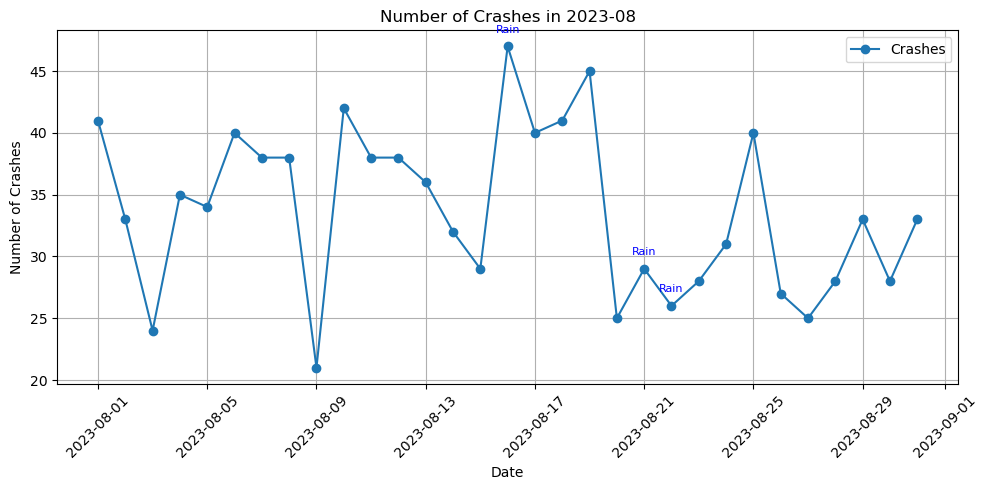

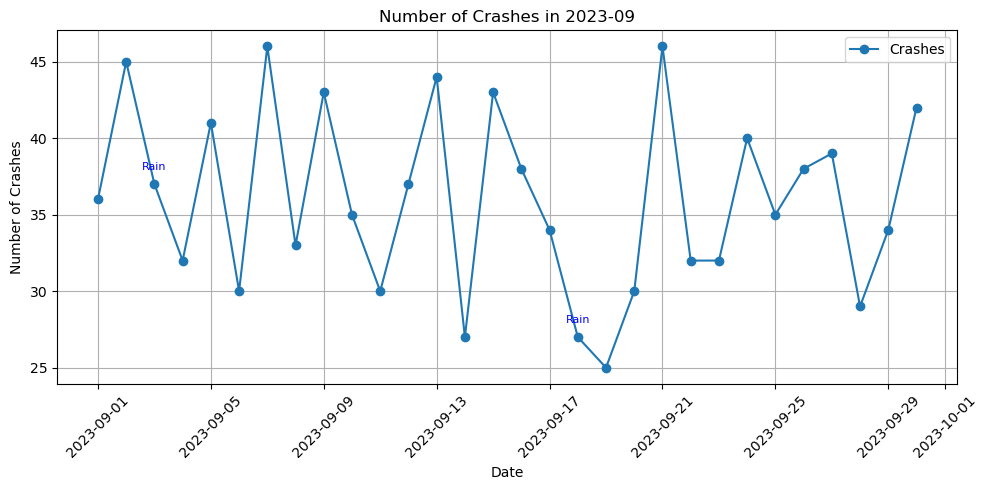

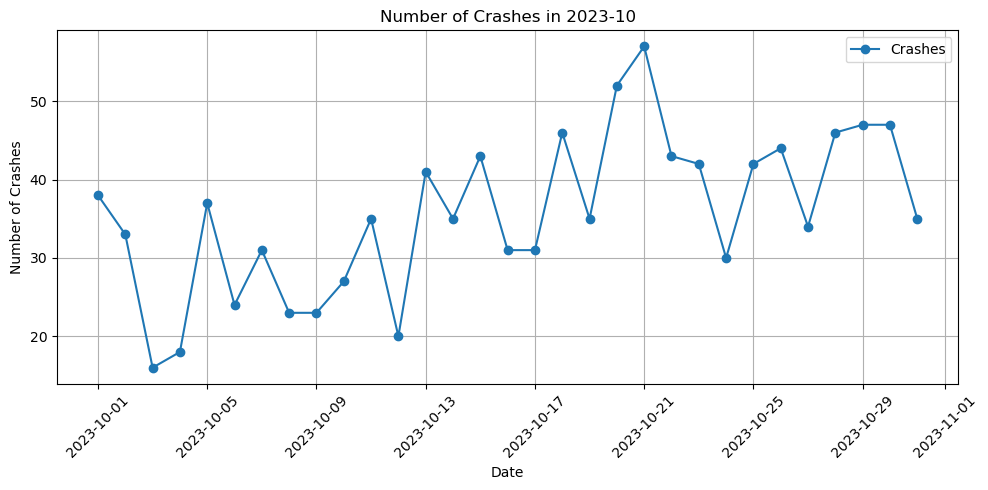

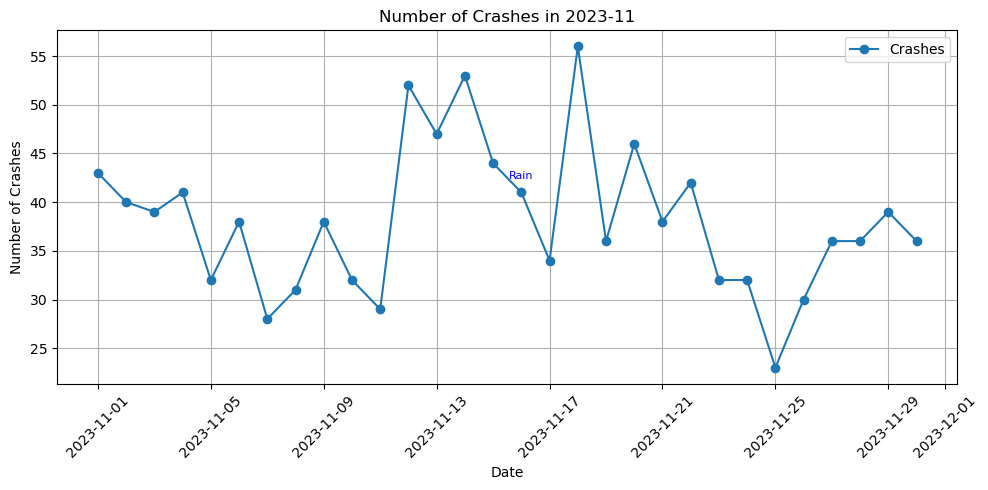

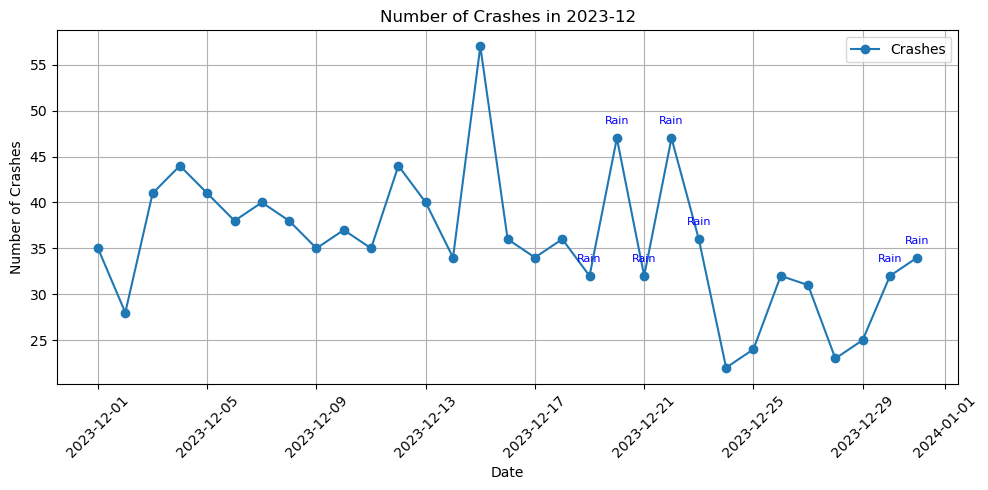

In [19]:
# Creates a plot for each month
crash_weather_df['Date'] = pd.to_datetime(crash_weather_df['Date'])
crash_weather_df['Month'] = crash_weather_df['Date'].dt.to_period('M')
unique_months = crash_weather_df['Month'].unique()

for m in unique_months:
    month_data = crash_weather_df[crash_weather_df['Month'] == m]
    plt.figure(figsize = (10, 5))
    plt.plot(month_data['Date'], month_data['crash_count'], marker = 'o', label = 'Crashes')
    for i, r in month_data.iterrows():
        if r['Rained'] == 'yes':
            plt.annotate('Rain', (r['Date'], r['crash_count']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='blue')
    plt.title(f'Number of Crashes in {m}')
    plt.xlabel('Date')
    plt.ylabel('Number of Crashes')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()